# Regression Discontinuity Designを用いて効果検証を行う

In [15]:
!pip install rdrobust
!pip install rddensity

## 5.1 RDDが適用できるシチュエーション
### 5.1.1 クーポン配布施策：クーポンの効果は本当に大きいのか？
#### プログラム 5.1太郎くんの分析を再現するコード
書籍上では次のようなコードになっています。

```python
import pandas as pd
import numpy as np
import pandas as pd

# データの読み込み
df_coupon= pd.read_csv(URL_COUPON)
display(df_coupon.head())

# 処置ごとの今月消費額の計算
df_coupon.groupby('treatment')[['this_month_spend']].mean()

# ラベルごとにデータを分ける
df_label0 = df_coupon[df_coupon['treatment'] == 0]
df_label1 = df_coupon[df_coupon['treatment'] == 1]

# 散布図の作成
fig, ax = plt.subplots()

ax.scatter(df_label0['last_month_spend'],df_label0['this_month_spend'], c='gray',label='0',marker='s')
ax.scatter(df_label1['last_month_spend'],df_label1['this_month_spend'], c='gray',label='1',marker='x')
threshold=10000
ax.axvline(x=threshold,color='black',linestyle='--')

# 軸ラベルと凡例の追加
ax.set_xlabel('last_month_spend')
ax.set_ylabel('this_month_spend')
ax.legend()

# グラフの表示
plt.show()

# 処置ごとの先月消費額と今月消費額の計算
df_coupon.groupby('treatment').mean()

```

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rddensity
from rdrobust import rdbwselect, rdplot, rdrobust

URL_COUPON = 'https://raw.githubusercontent.com/HirotakeIto/intro_to_impact_evaluation_with_python/main/data/ch5_coupon.csv'
URL_COUPON_V2 = 'https://raw.githubusercontent.com/HirotakeIto/intro_to_impact_evaluation_with_python/main/data/ch5_coupon_v2.csv'

In [18]:
# データの読み込み
df_coupon= pd.read_csv(URL_COUPON)
display(df_coupon.head())

,last_month_spend,this_month_spend,sex,age,treatment
0,11900,17185,0,78,1
1,11621,22057,0,67,1
2,7236,10703,0,31,0
3,10501,17589,1,47,1
4,11284,17804,1,59,1


#### plotの再現

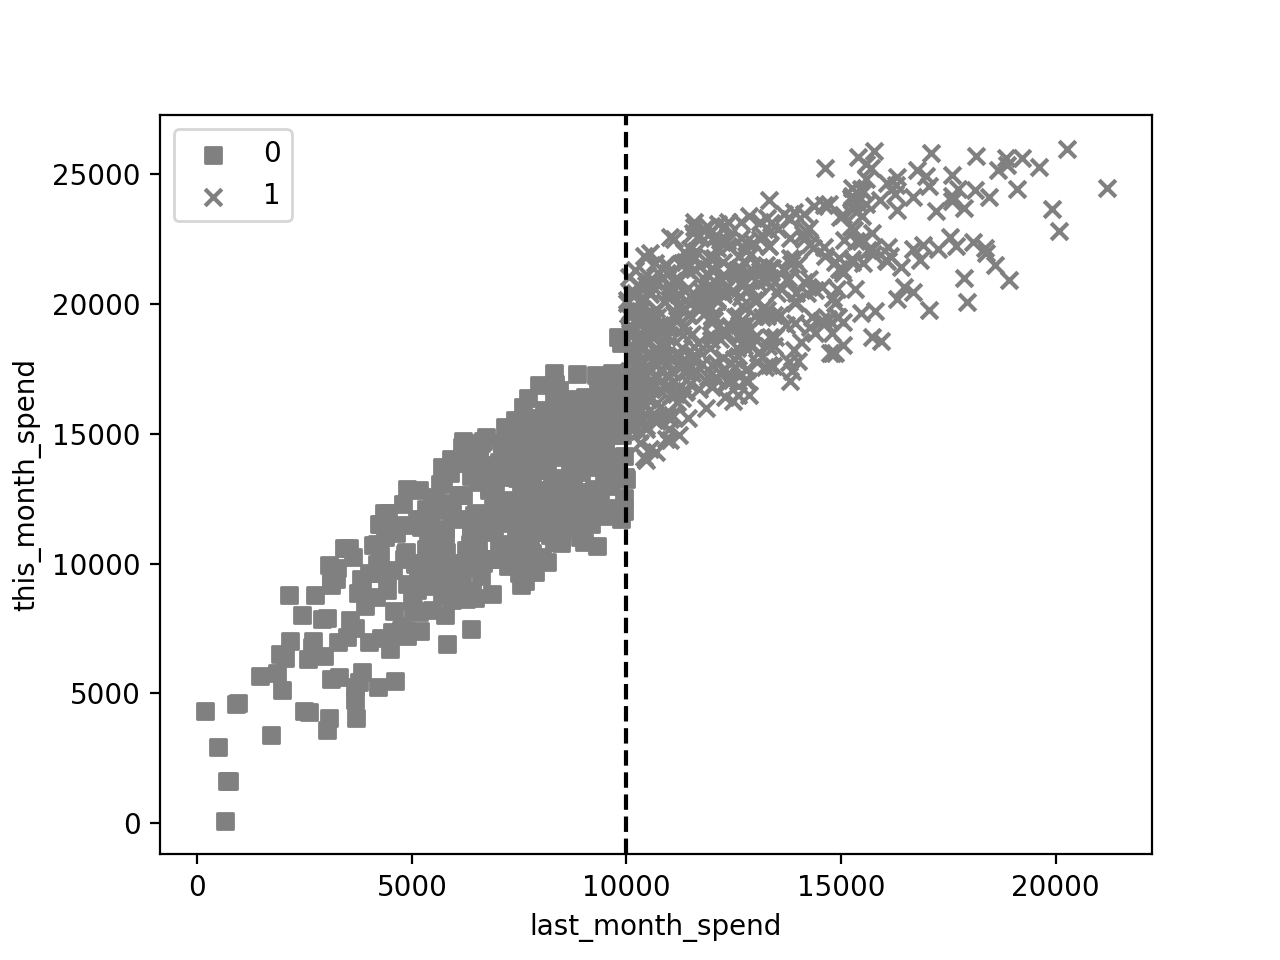

In [19]:
df_coupon = df_coupon[['last_month_spend', 'this_month_spend', 'treatment']]

# ラベルごとにデータを分ける
df_label0 = df_coupon[df_coupon['treatment'] == 0]
df_label1 = df_coupon[df_coupon['treatment'] == 1]

# 散布図の作成
fig, ax = plt.subplots()

ax.scatter(df_label0['last_month_spend'],df_label0['this_month_spend'], c='gray',label='0',marker='s')
ax.scatter(df_label1['last_month_spend'],df_label1['this_month_spend'], c='gray',label='1',marker='x')
threshold=10000
ax.axvline(x=threshold,color='black',linestyle='--')

# 軸ラベルと凡例の追加
ax.set_xlabel('last_month_spend')
ax.set_ylabel('this_month_spend')
ax.legend()

# グラフの表示
plt.show()

#### 今月の売り上げの集計

In [20]:
# 処置ごとの今月消費額の計算
df_coupon.groupby('treatment')[['this_month_spend']].mean()

,this_month_spend
treatment,
0,11868.546414
1,19956.193916


#### 先月と今月の売り上げの集計

In [21]:
# 処置ごとの先月消費額と今月消費額の計算
df_coupon.groupby('treatment').mean()

,last_month_spend,this_month_spend
treatment,,
0,6888.599156,11868.546414
1,12728.733840,19956.193916


## 5.2 Sharp RDDの仮定と推定
### 5.2.4 rdrobustパッケージを用いたSharpRDDの推定の実装
#### プログラム5.2 SharpRDDの推定のコード
書籍上では次のようなコードになっています。

```python
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rddensity
from rdrobust import rdbwselect, rdplot, rdrobust

# データの読み込み
df_coupon= pd.read_csv(URL_COUPON)

# 推定と結果の出力
rdrobust(y=df_coupon.this_month_spend, 
         x=df_coupon.last_month_spend, 
         c= 10000, 
         all=True)

# プロット
rdplot(y=df_coupon.this_month_spend, 
       x=df_coupon.last_month_spend,
       binselect="es",  
       c=10000,
       ci=95,
       title="Causal Effects of Coupons", 
       y_label="this_month_spend",
       x_label="last_month_spend")
```

In [7]:
# データの読み込み
df_coupon= pd.read_csv(URL_COUPON)

#### rdrobustによる推定

In [8]:
# 推定と結果の出力
rdrobust(y=df_coupon.this_month_spend, x=df_coupon.last_month_spend, c= 10000, all=True)

Call: rdrobust
Number of Observations:                  1000
Polynomial Order Est. (p):                  1
Polynomial Order Bias (q):                  2
Kernel:                            Triangular
Bandwidth Selection:                    mserd
Var-Cov Estimator:                         NN

                                Left      Right
------------------------------------------------
Number of Observations           474        526
Number of Unique Obs.            457        508
Number of Effective Obs.         275        344
Bandwidth Estimation         3142.14    3142.14
Bandwidth Bias              5102.166   5102.166
rho (h/b)                      0.616      0.616

Method             Coef.     S.E.   t-stat    P>|t|       95% CI      
-------------------------------------------------------------------------
Conventional    2751.558  362.121    7.598   2.997e-14 [2041.813, 3461.303]
Bias-Corrected   2709.09  362.121    7.481   7.367e-14 [1999.345, 3418.835]
Robust           2709.09 

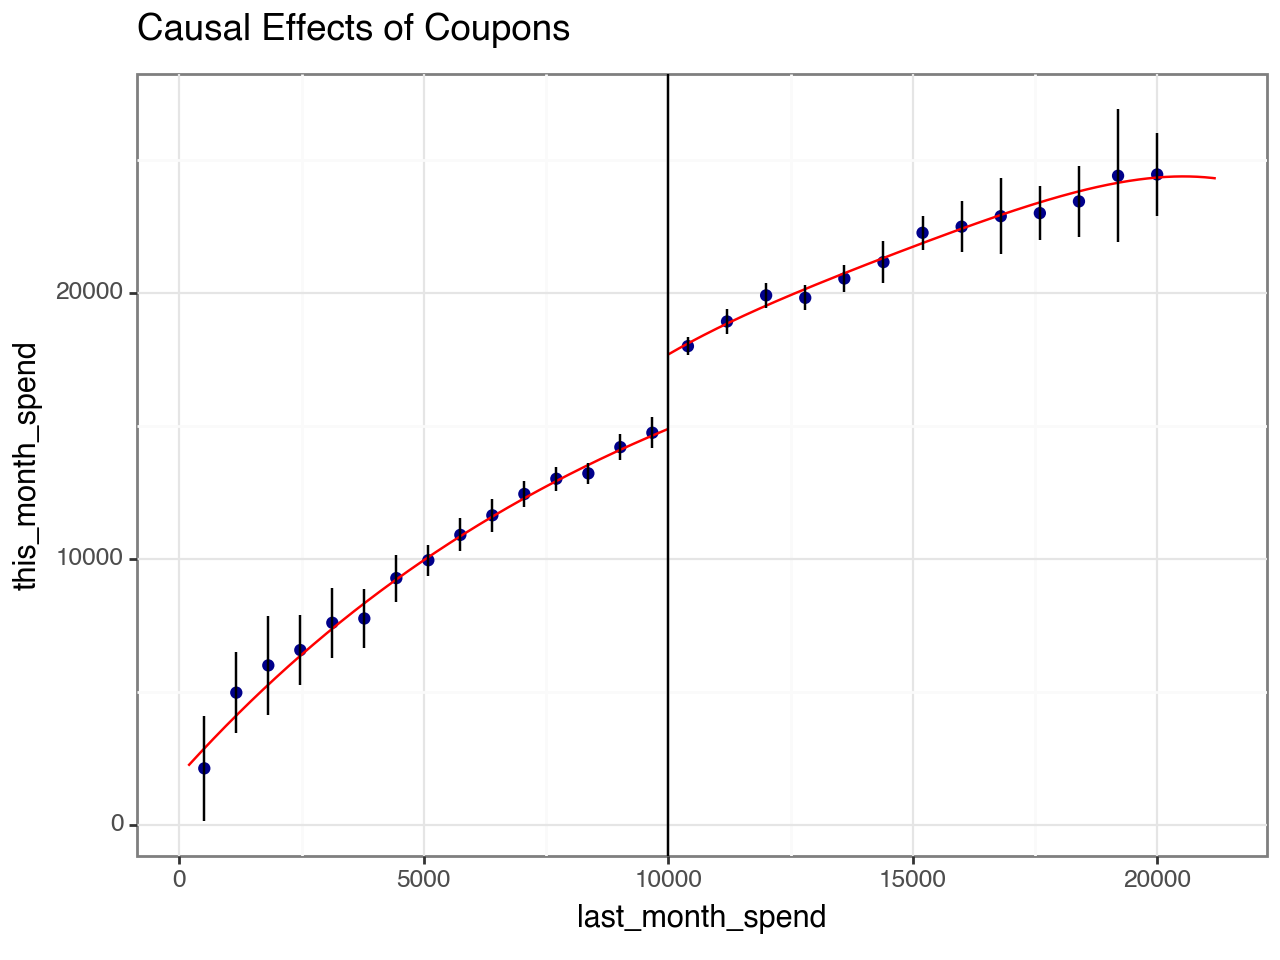


Call: rdplot
Number of Observations:                  1000
Kernel:                               Uniform
Polynomial Order Est. (p):                  4

                                Left      Right
------------------------------------------------
Number of Observations           474        526
Number of Effective Obs          474        526
Bandwith poly. fit (h)          9818      11196
Number of bins scale               1          1
Bins Selected                     15         14
Average Bin Length           654.533    799.714
Median Bin Length            654.533    799.714
IMSE-optimal bins               15.0       14.0
Mimicking Variance bins         61.0       46.0

Relative to IMSE-optimal:
Implied scale                    1.0        1.0
WIMSE variance weight            0.5        0.5
WIMSE bias weight                0.5        0.5


In [9]:
# プロット
rdplot(y=df_coupon.this_month_spend, 
       x=df_coupon.last_month_spend,
       binselect="es",  
       c=10000,
       ci=95,
       title="Causal Effects of Coupons", 
       y_label="this_month_spend",
       x_label="last_month_spend")

### 5.2.6 McCraryの検定の実装
#### プログラム5.3 McCraryの検定のコード（SharpRDDの推定のコードの続き）
書籍上では次のようなコードになっています。

```python
## ヒストグラムのプロット
plt.hist(df_coupon.last_month_spend, range=(9000, 11000))

# McCraryの検定
rddensity.rddensity(X=df_coupon.last_month_spend, c = 10000)
```

(array([12., 15., 11., 14., 11., 30., 33., 34., 25., 20.]),
 array([ 9000.,  9200.,  9400.,  9600.,  9800., 10000., 10200., 10400.,
        10600., 10800., 11000.]),
 <BarContainer object of 10 artists>)

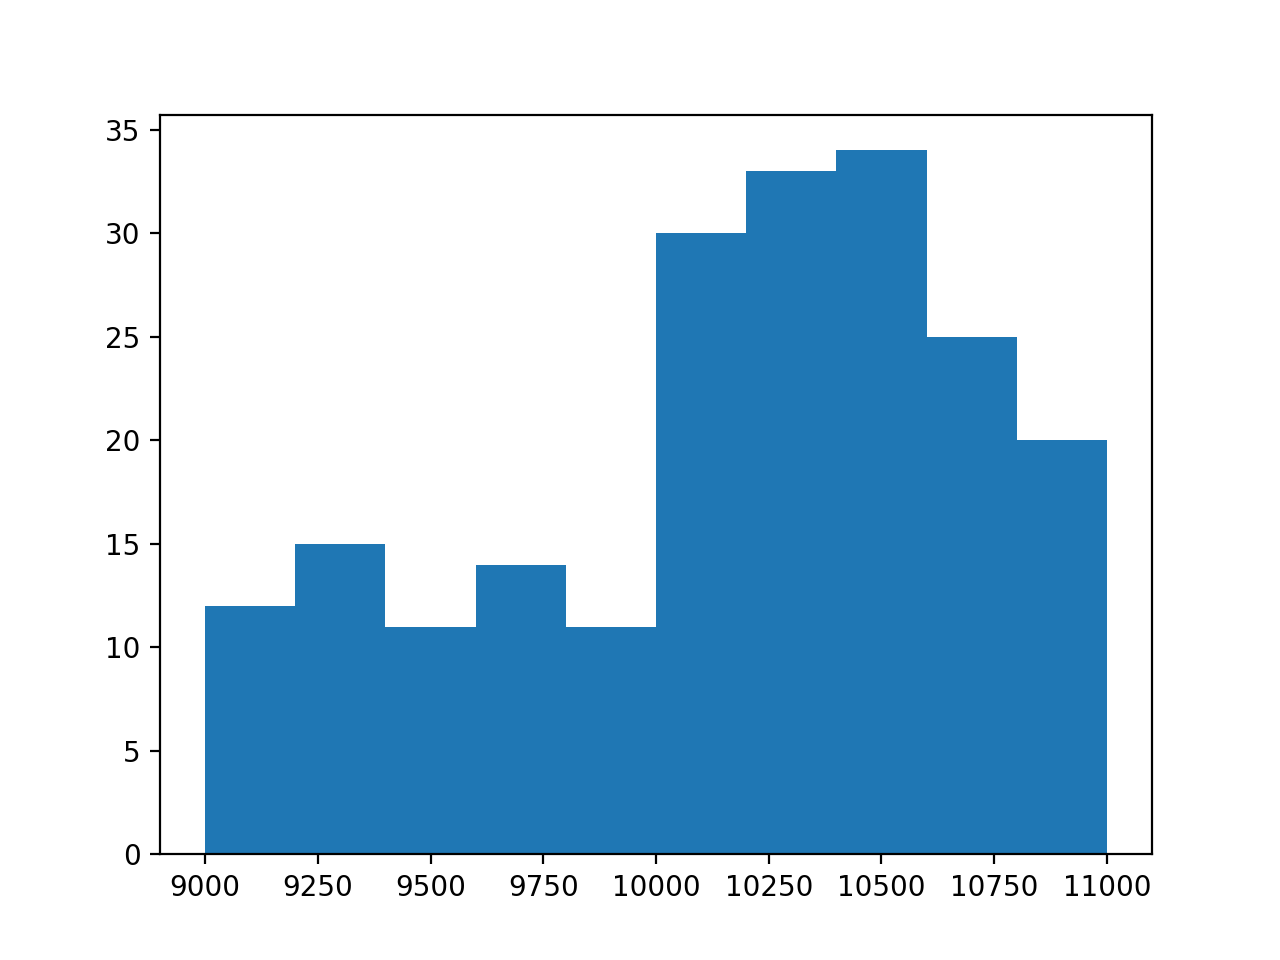

In [10]:
## ヒストグラムのプロット
plt.hist(df_coupon.last_month_spend, range=(9000, 11000))

In [11]:
# McCraryの検定
rddensity.rddensity(X=df_coupon.last_month_spend, c = 10000)

Manipulation testing using local polynomial density estimation
Number of obs:                              1000
Model:                              unrestricted
Kernel:                               triangular
BW method:                             estimated
VCE:                                   jackknife

c = 10000                           Left of c             Right of c
Number of obs:                            474                    526
Eff. number of obs:                       126                    234
Order est. (p):                             2                      2
Order bias. (q):                            3                      3
BW est.                             1654.8133              1946.1021

Method:                                     T                P > |T|
Robust                                  3.328                 0.0009

P-values of binomial tests (H0: p =  [0.5] ).

Window Length/2                           < c                     >= c                    

### 5.2.7共変量のバランステストの実装
#### プログラム5.4バランステストのコード
書籍上では次のようなコードになっています。

```python
df_coupon= pd.read_csv(URL_COUPON)

# バランステストの結果を格納するデータフレームの作成
covs = df_coupon[['sex','age']]
balance = pd.DataFrame(columns = ["RD Effect", "Robust p-val"],
                       index = pd.Index(['sex','age']))

# バランステスト
for z in covs.columns:
    est = rdrobust(y=covs[z], x=df_coupon.last_month_spend, c= 10000)
    balance.loc[z,"RD Effect"] = est.Estimate["tau.us"].values[0]
    balance.loc[z,"Robust p-val"] = est.pv.iloc[2].values[0]

# 結果の表示  
display(balance)
```

In [14]:
df_coupon= pd.read_csv(URL_COUPON)

# バランステストの結果を格納するデータフレームの作成
covs = df_coupon[['sex','age']]
balance = pd.DataFrame(columns = ["RD Effect", "Robust p-val"],
                       index = pd.Index(['sex','age']))

# バランステスト
for z in covs.columns:
    est = rdrobust(y=covs[z], x=df_coupon.last_month_spend, c= 10000)
    balance.loc[z,"RD Effect"] = est.Estimate["tau.us"].values[0]
    balance.loc[z,"Robust p-val"] = est.pv.iloc[2].values[0]

# 結果の表示  
display(balance)

,RD Effect,Robust p-val
sex,0.010663,0.929465
age,0.667869,0.978184


## 5.3 Fuzzy RDD
### 5.3.1 rdrobustパッケージを用いたFuzzyRDDの推定の実装
#### プログラム5.5 FuzzyRDD推定のコード
書籍上では次のようなコードになっています。

```python
# データの読み込み
df_coupon= pd.read_csv(URL_COUPON_V2)
df_coupon.head()

# ラベルごとにデータを分ける
df_label0 = df_coupon[df_coupon['treatment'] == 0]
df_label1 = df_coupon[df_coupon['treatment'] == 1]

# 散布図の作成
fig, ax = plt.subplots()

ax.scatter(df_label0['last_month_spend'],df_label0['this_month_spend'], c='gray',label='0',marker='s')
ax.scatter(df_label1['last_month_spend'],df_label1['this_month_spend'], c='gray',label='1',marker='x')
threshol=10000
ax.axvline(x=threshold,color='black',linestyle='--')

# 軸ラベルと凡例の追加
ax.set_xlabel('last_month_spend')
ax.set_ylabel('this_month_spend')
ax.legend()

# グラフの表示
plt.show()

# 推定と結果の出力
rdrobust(y=df_coupon.this_month_spend, x=df_coupon.last_month_spend, fuzzy= df_coupon.treatment, c = 10000, all=True)
```

In [28]:
# データの読み込み
df_coupon= pd.read_csv(URL_COUPON_V2)
df_coupon.head()

,last_month_spend,this_month_spend,treatment
0,11900,21241,0
1,11621,23249,1
2,7236,12473,0
3,10501,18700,1
4,11284,9825,1


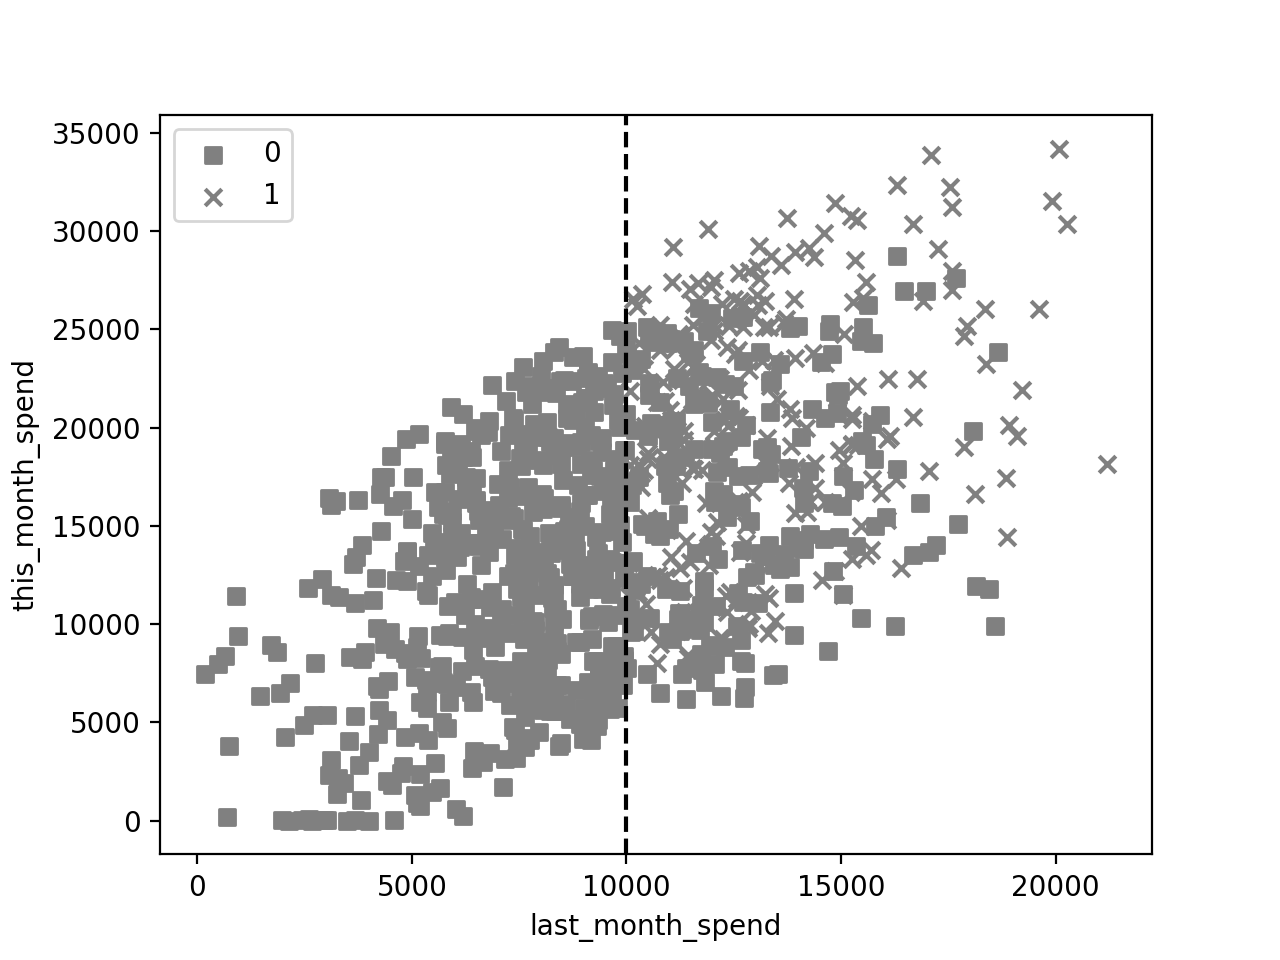

In [29]:
# ラベルごとにデータを分ける
df_label0 = df_coupon[df_coupon['treatment'] == 0]
df_label1 = df_coupon[df_coupon['treatment'] == 1]

# 散布図の作成
fig, ax = plt.subplots()

ax.scatter(df_label0['last_month_spend'],df_label0['this_month_spend'], c='gray',label='0',marker='s')
ax.scatter(df_label1['last_month_spend'],df_label1['this_month_spend'], c='gray',label='1',marker='x')
threshol=10000
ax.axvline(x=threshold,color='black',linestyle='--')

# 軸ラベルと凡例の追加
ax.set_xlabel('last_month_spend')
ax.set_ylabel('this_month_spend')
ax.legend()

# グラフの表示
plt.show()

In [30]:
# 推定と結果の出力
rdrobust(y=df_coupon.this_month_spend, x=df_coupon.last_month_spend, fuzzy= df_coupon.treatment, c = 10000, all=True)

Call: rdrobust
Number of Observations:                  1000
Polynomial Order Est. (p):                  1
Polynomial Order Bias (q):                  2
Kernel:                            Triangular
Bandwidth Selection:                    mserd
Var-Cov Estimator:                         NN

                                Left      Right
------------------------------------------------
Number of Observations           528        472
Number of Unique Obs.            505        462
Number of Effective Obs.         258        219
Bandwidth Estimation        2316.136   2316.136
Bandwidth Bias               3543.11    3543.11
rho (h/b)                      0.654      0.654

Method             Coef.     S.E.   t-stat    P>|t|       95% CI      
-------------------------------------------------------------------------
Conventional    6531.203 2645.704    2.469   1.356e-02 [1345.719, 11716.687]
Bias-Corrected  6671.428 2645.704    2.522   1.168e-02 [1485.944, 11856.912]
Robust          6671.42